In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [7]:
# Getting Data
data = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [9]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Dr0op unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.columns = ['labels', 'data']

In [15]:
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Create binary label variables 
data['b_labels'] = data['labels'].map({'ham': 0, 'spam': 1})
Y = data['b_labels'].values

In [19]:
data.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
# Split the data
df_train, df_test, Ytrain, Ytest = train_test_split(data['data'], Y, test_size=0.33)

In [21]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [37]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V, "Unique Tokens Founds")

7151 Unique Tokens Founds


In [43]:
# Pad sequences so that we can get N x T matrix
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [44]:
# Sequence length
T = data_train.shape[1]

In [46]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 189)

In [47]:
# Create the model
# Embedding dimensionality
D = 20

# Hidden State D
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [49]:
# Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 13s 112ms/step - loss: 0.4581 - accuracy: 0.8655 - val_loss: 0.3887 - val_accuracy: 0.8668
Epoch 2/10
117/117 [==============================] - 13s 108ms/step - loss: 0.3637 - accuracy: 0.8655 - val_loss: 0.3201 - val_accuracy: 0.8668
Epoch 3/10
117/117 [==============================] - 12s 99ms/step - loss: 0.2638 - accuracy: 0.8655 - val_loss: 0.2369 - val_accuracy: 0.8668
Epoch 4/10
117/117 [==============================] - 12s 99ms/step - loss: 0.1615 - accuracy: 0.9432 - val_loss: 0.1691 - val_accuracy: 0.9598
Epoch 5/10
117/117 [==============================] - 12s 102ms/step - loss: 0.1002 - accuracy: 0.9885 - val_loss: 0.1374 - val_accuracy: 0.9706
Epoch 6/10
117/117 [==============================] - 12s 99ms/step - loss: 0.0670 - accuracy: 0.9928 - val_loss: 0.1169 - val_accuracy: 0.9706
Epoch 7/10
117/117 [==============================] - 11s 98ms/step - loss: 0.0464 - accuracy: 0.9949 - val_loss: 0.1079 - val_accura

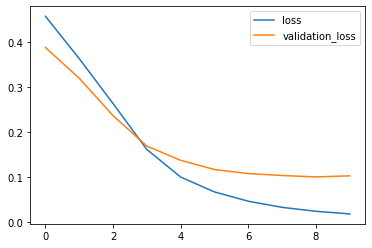

In [50]:
# plot loss per iteration
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation_loss')
plt.legend()

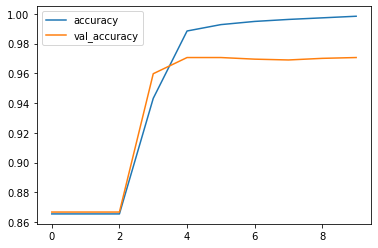

In [51]:
# Plot accuracy per iteration
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()